In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a7946c70a0a4583f29394a26fcdcd173


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-66.37334642202971 -163.60792061615476
-3.194824674582918 174.76113374728158
-68.0141382830173 -83.75286732264546
30.27166643668299 94.82398423952628
-53.11620440689126 -160.30728332651134
-48.6782772814924 -150.58778145219372
24.94043826417071 -60.740946971879595
1.5826227428614885 -169.8279923877491
9.614562600884867 -131.99508625343316
-47.595460239821165 161.97937929416162
85.80955494891893 -38.75151219615816
16.956874680408276 24.01463617898017
32.172514180714984 70.2496636144005
-50.582577276416586 69.33333864547757
-36.202630631765466 69.61992343243972
-69.68710941712698 74.77881595435952
38.536266523663926 68.06887424477793
66.97277679539317 174.36412736615807
46.945277502279 -51.91706439486302
-84.77579162495002 -146.61327071477749
70.37736508848084 -35.54338297809599
86.45745989575681 -145.97455064412463
-14.488920058723181 -49.32314276814262
-23.15148284722021 144.28722023395449
28.181938852524866 -46.928362416962045
45.80487996740524 -68.1676676198188
-25.289670264328365 -7

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | ijaki
City not found. Skipping...
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | along
Processing Record 5 of Set 1 | the valley
Processing Record 6 of Set 1 | saleaula
City not found. Skipping...
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | tuatapere
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | kutum
Processing Record 11 of Set 1 | tank
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | tursunzoda
Processing Record 15 of Set 1 | komsomolskiy
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | uruacu
Processing Record 19 of Set 1 | charters towers
Processing Record 20 of Set 1 | saint george
Processing Record 21 of Set 1 | houlton
Processing Record 22 of 

Processing Record 36 of Set 4 | walvis bay
Processing Record 37 of Set 4 | lagoa
Processing Record 38 of Set 4 | riverbank
Processing Record 39 of Set 4 | faya
Processing Record 40 of Set 4 | geraldton
Processing Record 41 of Set 4 | hobyo
Processing Record 42 of Set 4 | dabakala
Processing Record 43 of Set 4 | baykit
Processing Record 44 of Set 4 | warrnambool
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | ambanja
Processing Record 48 of Set 4 | viedma
Processing Record 49 of Set 4 | bengkulu
Processing Record 50 of Set 4 | san patricio
Processing Record 1 of Set 5 | garowe
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | namwala
Processing Record 4 of Set 5 | chegdomyn
Processing Record 5 of Set 5 | egvekinot
Processing Record 6 of Set 5 | lavrentiya
Processing Record 7 of Set 5 | lima
Processing Record 8 of Set 5 | palestina
Processing Record 9 of Set 5 | muriwai bea

Processing Record 26 of Set 8 | mentok
City not found. Skipping...
Processing Record 27 of Set 8 | narsaq
Processing Record 28 of Set 8 | buala
Processing Record 29 of Set 8 | fare
Processing Record 30 of Set 8 | cabedelo
Processing Record 31 of Set 8 | calama
Processing Record 32 of Set 8 | vostok
Processing Record 33 of Set 8 | kardla
Processing Record 34 of Set 8 | konevo
Processing Record 35 of Set 8 | kloulklubed
Processing Record 36 of Set 8 | karaton
Processing Record 37 of Set 8 | kysyl-syr
Processing Record 38 of Set 8 | begunitsy
Processing Record 39 of Set 8 | mnogovershinnyy
Processing Record 40 of Set 8 | oranjemund
Processing Record 41 of Set 8 | samusu
City not found. Skipping...
Processing Record 42 of Set 8 | namatanai
Processing Record 43 of Set 8 | dehloran
Processing Record 44 of Set 8 | opuwo
Processing Record 45 of Set 8 | kavaratti
Processing Record 46 of Set 8 | poya
Processing Record 47 of Set 8 | amderma
City not found. Skipping...
Processing Record 48 of Set 

Processing Record 12 of Set 12 | vredendal
Processing Record 13 of Set 12 | high level
Processing Record 14 of Set 12 | ola
Processing Record 15 of Set 12 | sherlovaya gora
Processing Record 16 of Set 12 | toliary
City not found. Skipping...
Processing Record 17 of Set 12 | muravlenko
Processing Record 18 of Set 12 | karasjok
Processing Record 19 of Set 12 | hervey bay
Processing Record 20 of Set 12 | coruche
Processing Record 21 of Set 12 | nemuro
Processing Record 22 of Set 12 | carutapera
Processing Record 23 of Set 12 | kununurra
Processing Record 24 of Set 12 | ivolginsk
Processing Record 25 of Set 12 | buariki
City not found. Skipping...
Processing Record 26 of Set 12 | asau
Processing Record 27 of Set 12 | ucluelet
Processing Record 28 of Set 12 | nha trang
Processing Record 29 of Set 12 | sanmenxia
Processing Record 30 of Set 12 | outram
Processing Record 31 of Set 12 | alindao
Processing Record 32 of Set 12 | higuey
City not found. Skipping...
Processing Record 33 of Set 12 | 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,61.43,59,87,7.81,NZ,2022-12-21 04:36:10
1,Punta Arenas,-53.1500,-70.9167,51.91,71,0,6.91,CL,2022-12-21 04:32:20
2,Along,28.1667,94.7667,71.51,39,83,0.83,IN,2022-12-21 04:36:11
3,The Valley,18.2170,-63.0578,79.11,74,1,15.35,AI,2022-12-21 04:36:12
4,Atuona,-9.8000,-139.0333,78.48,80,9,21.83,PF,2022-12-21 04:36:12
5,Tuatapere,-46.1333,167.6833,63.52,57,20,9.73,NZ,2022-12-21 04:36:13
6,Tasiilaq,65.6145,-37.6368,12.36,54,6,3.87,GL,2022-12-21 04:36:13
7,Kutum,14.2000,24.6667,57.85,50,33,5.68,SD,2022-12-21 04:36:14
8,Tank,32.2217,70.3793,66.22,23,0,2.21,PK,2022-12-21 04:36:15
9,Saint-Philippe,-21.3585,55.7679,81.99,77,96,7.29,RE,2022-12-21 04:36:15


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-12-21 04:36:10,-46.1927,168.8643,61.43,59,87,7.81
1,Punta Arenas,CL,2022-12-21 04:32:20,-53.1500,-70.9167,51.91,71,0,6.91
2,Along,IN,2022-12-21 04:36:11,28.1667,94.7667,71.51,39,83,0.83
3,The Valley,AI,2022-12-21 04:36:12,18.2170,-63.0578,79.11,74,1,15.35
4,Atuona,PF,2022-12-21 04:36:12,-9.8000,-139.0333,78.48,80,9,21.83
5,Tuatapere,NZ,2022-12-21 04:36:13,-46.1333,167.6833,63.52,57,20,9.73
6,Tasiilaq,GL,2022-12-21 04:36:13,65.6145,-37.6368,12.36,54,6,3.87
7,Kutum,SD,2022-12-21 04:36:14,14.2000,24.6667,57.85,50,33,5.68
8,Tank,PK,2022-12-21 04:36:15,32.2217,70.3793,66.22,23,0,2.21
9,Saint-Philippe,RE,2022-12-21 04:36:15,-21.3585,55.7679,81.99,77,96,7.29


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

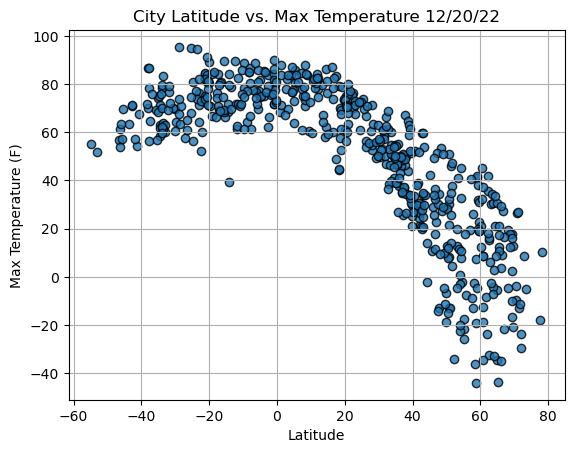

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

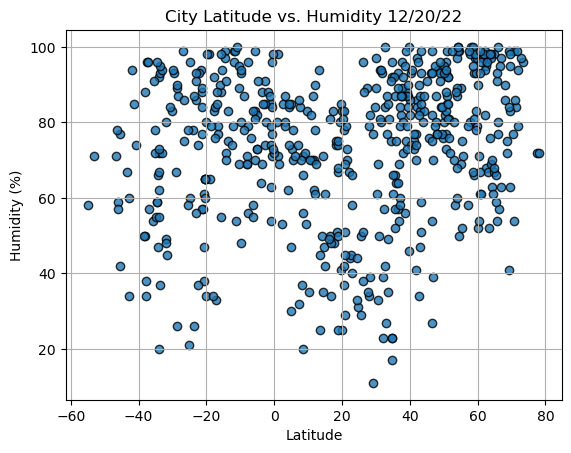

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

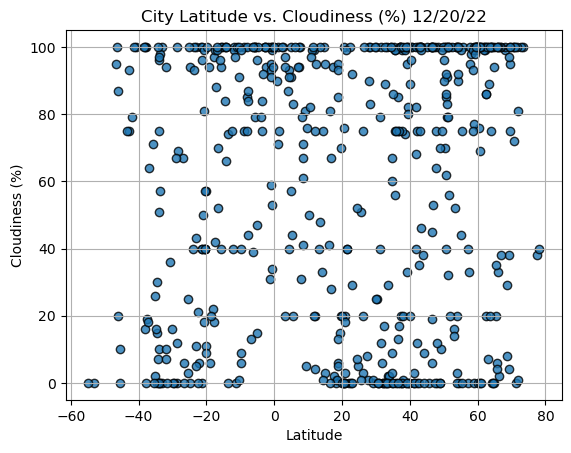

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

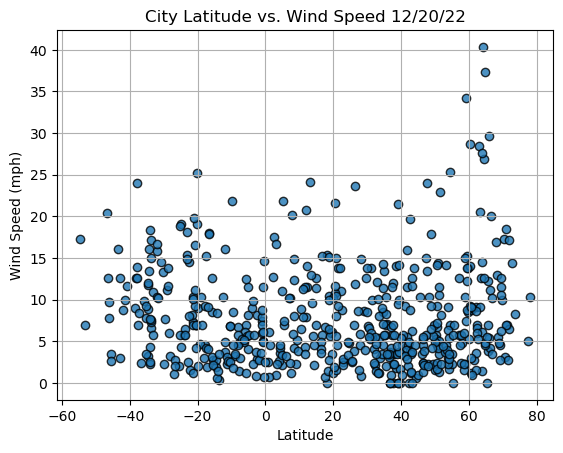

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()